In [1]:
import os
import shutil
import pathlib

from google.colab import drive
drive.mount('/content/drive')

i_p = pathlib.Path(r"/content/drive/MyDrive/cats_vs_dogs_small")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow import keras
from tensorflow.keras import layers

x_base_input = keras.Input(shape=(180, 180, 3))
x_base_rescale = layers.Rescaling(1./255)(x_base_input)
x_base_conv1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x_base_rescale)
x_base_pool1 = layers.MaxPooling2D(pool_size=2)(x_base_conv1)
x_base_conv2 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x_base_pool1)
x_base_pool2 = layers.MaxPooling2D(pool_size=2)(x_base_conv2)
x_base_conv3 = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x_base_pool2)
x_base_pool3 = layers.MaxPooling2D(pool_size=2)(x_base_conv3)
x_base_conv4 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x_base_pool3)
x_base_pool4 = layers.MaxPooling2D(pool_size=2)(x_base_conv4)
x_base_conv5 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x_base_pool4)
x_base_flatten = layers.Flatten()(x_base_conv5)
x_base_output = layers.Dense(1, activation="sigmoid")(x_base_flatten)

mod_base = keras.Model(inputs=x_base_input, outputs=x_base_output)
mod_base_1500 = keras.Model(inputs=x_base_input, outputs=x_base_output)
mod_base_500 = keras.Model(inputs=x_base_input, outputs=x_base_output)

Model With dropout

In [3]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Base input
x_d_input = keras.Input(shape=(180, 180, 3))
x_d_rescale = layers.Rescaling(1./255)(x_d_input)
x_d_conv1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x_d_rescale)
x_d_pool1 = layers.MaxPooling2D(pool_size=2)(x_d_conv1)
x_d_conv2 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x_d_pool1)
x_d_pool2 = layers.MaxPooling2D(pool_size=2)(x_d_conv2)
x_d_conv3 = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x_d_pool2)
x_d_pool3 = layers.MaxPooling2D(pool_size=2)(x_d_conv3)
x_d_conv4 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x_d_pool3)
x_d_pool4 = layers.MaxPooling2D(pool_size=2)(x_d_conv4)
x_d_conv5 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x_d_pool4)
x_d_pool5 = layers.Flatten()(x_d_conv5)
x_d_dropout = layers.Dropout(0.5)(x_d_pool5)
x_d_output = layers.Dense(1, activation="sigmoid")(x_d_dropout)

mod_d = keras.Model(inputs=x_d_input, outputs=x_d_output)
mod_d_2000 = keras.Model(inputs=x_d_input, outputs=x_d_output)

Model with L2

In [4]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

x_L2_input = keras.Input(shape=(180, 180, 3))
x_L2_rescale = layers.Rescaling(1./255)(x_L2_input)
x_L2_conv1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu", kernel_regularizer=regularizers.l2(0.005))(x_L2_rescale)
x_L2_pool1 = layers.MaxPooling2D(pool_size=2)(x_L2_conv1)
x_L2_conv2 = layers.Conv2D(filters=64, kernel_size=3, activation="relu", kernel_regularizer=regularizers.l2(0.005))(x_L2_pool1)
x_L2_pool2 = layers.MaxPooling2D(pool_size=2)(x_L2_conv2)
x_L2_conv3 = layers.Conv2D(filters=128, kernel_size=3, activation="relu", kernel_regularizer=regularizers.l2(0.005))(x_L2_pool2)
x_L2_pool3 = layers.MaxPooling2D(pool_size=2)(x_L2_conv3)
x_L2_conv4 = layers.Conv2D(filters=256, kernel_size=3, activation="relu", kernel_regularizer=regularizers.l2(0.005))(x_L2_pool3)
x_L2_pool4 = layers.MaxPooling2D(pool_size=2)(x_L2_conv4)
x_L2_conv5 = layers.Conv2D(filters=256, kernel_size=3, activation="relu", kernel_regularizer=regularizers.l2(0.005))(x_L2_pool4)
x_L2_flatten = layers.Flatten()(x_L2_conv5)
x_L2_output = layers.Dense(1, activation="sigmoid")(x_L2_flatten)

mod_L2 = keras.Model(inputs=x_L2_input, outputs=x_L2_output)

Model with Dropout and L2

In [5]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

x_d_L2_input = keras.Input(shape=(180, 180, 3))
x_d_L2_rescale = layers.Rescaling(1./255)(x_d_L2_input)
x_d_L2_conv1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu", kernel_regularizer=regularizers.l2(0.001))(x_d_L2_rescale)
x_d_L2_pool1 = layers.MaxPooling2D(pool_size=2)(x_d_L2_conv1)
x_d_L2_conv2 = layers.Conv2D(filters=64, kernel_size=3, activation="relu", kernel_regularizer=regularizers.l2(0.001))(x_d_L2_pool1)
x_d_L2_pool2 = layers.MaxPooling2D(pool_size=2)(x_d_L2_conv2)
x_d_L2_conv3 = layers.Conv2D(filters=128, kernel_size=3, activation="relu", kernel_regularizer=regularizers.l2(0.001))(x_d_L2_pool2)
x_d_L2_pool3 = layers.MaxPooling2D(pool_size=2)(x_d_L2_conv3)
x_d_L2_conv4 = layers.Conv2D(filters=256, kernel_size=3, activation="relu", kernel_regularizer=regularizers.l2(0.001))(x_d_L2_pool3)
x_d_L2_pool4 = layers.MaxPooling2D(pool_size=2)(x_d_L2_conv4)
x_d_L2_conv5 = layers.Conv2D(filters=256, kernel_size=3, activation="relu", kernel_regularizer=regularizers.l2(0.001))(x_d_L2_pool4)
x_d_L2_flatten = layers.Flatten()(x_d_L2_conv5)
x_d_L2_dropout = layers.Dropout(0.25)(x_d_L2_flatten)
x_d_L2_output = layers.Dense(1, activation="sigmoid")(x_d_L2_dropout)

mod_d_L2 = keras.Model(inputs=x_d_L2_input, outputs=x_d_L2_output)

In [6]:
mod_base.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
mod_d.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
mod_L2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
mod_d_L2.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Setting up every model for training

assembling every Keras model into TensorFlow-SMD

To modify, double-click (or press Enter).

In [10]:
mod_base.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [11]:
mod_d.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [12]:
mod_L2.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [13]:
mod_d_L2.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [14]:
mod_base_1500.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [15]:
mod_d_2000.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [16]:
mod_base_500.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [17]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# Set the random seed for reproducibility
seed = 143
tf.random.set_seed(seed)

# Load the datasets from the directory with shuffling
train_full_dataset = image_dataset_from_directory(
    i_p / "train",
    image_size=(180, 180),
    batch_size=32,
    shuffle=True,
    seed=seed
)

validation_full_dataset = image_dataset_from_directory(
    i_p / "validation",
    image_size=(180, 180),
    batch_size=32,
    shuffle=True,
    seed=seed
)

test_full_dataset = image_dataset_from_directory(
    i_p / "test",
    image_size=(180, 180),
    batch_size=32,
    shuffle=True,
    seed=seed
)

# Create smaller datasets
train_dataset = train_full_dataset.take(1000)
train_dataset_1500 = train_full_dataset.take(1500)
train_dataset_500 = train_full_dataset.take(500)
train_dataset_2000 = train_dataset.shuffle(buffer_size=2000)
validation_dataset = validation_full_dataset.take(500)
validation_dataset_1000 = validation_full_dataset.take(1000)
test_dataset = test_full_dataset.take(500)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [18]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [19]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [20]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [21]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [22]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Adjusting the model to the data

In [23]:
# Define the callbacks for model training
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,  # Number of epochs to wait for improvement
        restore_best_weights=True  # Restore model weights from the epoch with the best value
    )
]

In [24]:
# Fit the base model
hist_base = mod_base.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.5283 - loss: 0.7246 - val_accuracy: 0.4990 - val_loss: 0.8923
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.5302 - loss: 0.7050 - val_accuracy: 0.6200 - val_loss: 0.6730
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.5621 - loss: 0.6812 - val_accuracy: 0.6260 - val_loss: 0.6528
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.6180 - loss: 0.6628 - val_accuracy: 0.6120 - val_loss: 0.6511
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.6453 - loss: 0.6164 - val_accuracy: 0.6600 - val_loss: 0.6036
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.6817 - loss: 0.5980 - val_accuracy: 0.5070 - val_loss: 0.8728
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.6702 - loss: 0.5989 - val_accuracy: 0.7130 - val_loss: 0.5693
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.7468 - loss: 0.5291 - val_accuracy

In [25]:
# Fit the base model
hist_base = mod_base_500.fit(
    train_dataset_500,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - accuracy: 0.7837 - loss: 0.4707 - val_accuracy: 0.6940 - val_loss: 0.6546
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.8279 - loss: 0.3926 - val_accuracy: 0.7010 - val_loss: 0.7588
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.8509 - loss: 0.3360 - val_accuracy: 0.7340 - val_loss: 0.5685
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.8825 - loss: 0.2742 - val_accuracy: 0.7540 - val_loss: 0.6299
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.9137 - loss: 0.2345 - val_accuracy: 0.7280 - val_loss: 0.8910
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.9098 - loss: 0.2148 - val_accuracy: 0.7230 - val_loss: 0.8002
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.9426 - loss: 0.1584 - val_accuracy: 0.7360 - val_loss: 0.8351
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.9489 - loss: 0.1253 - val_accur

In [26]:
# Fit the base model
hist_base_1500 = mod_base_1500.fit(
    train_dataset_1500,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 162ms/step - accuracy: 0.8519 - loss: 0.3590 - val_accuracy: 0.7490 - val_loss: 0.6105
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.8872 - loss: 0.2624 - val_accuracy: 0.7220 - val_loss: 0.7522
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.9131 - loss: 0.2034 - val_accuracy: 0.7430 - val_loss: 0.7620
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.9468 - loss: 0.1517 - val_accuracy: 0.7330 - val_loss: 0.9513
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.9425 - loss: 0.1731 - val_accuracy: 0.7190 - val_loss: 1.0075
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.9501 - loss: 0.1209 - val_accuracy: 0.7450 - val_loss: 0.9861
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.9727 - loss: 0.0984 - val_accuracy: 0.7120 - val_loss: 1.5060
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - accuracy: 0.9517 - loss: 0.1373 - val_accura

In [27]:
# Fit the base model
hist_d_2000 = mod_d_2000.fit(
    train_dataset_2000,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 128ms/step - accuracy: 0.4931 - loss: 0.7692 - val_accuracy: 0.4990 - val_loss: 0.6925
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.5386 - loss: 0.6907 - val_accuracy: 0.5150 - val_loss: 0.6913
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.5569 - loss: 0.6928 - val_accuracy: 0.5170 - val_loss: 0.6981
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 115ms/step - accuracy: 0.5783 - loss: 0.6991 - val_accuracy: 0.5770 - val_loss: 0.6835
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.6021 - loss: 0.6655 - val_accuracy: 0.5700 - val_loss: 0.6760
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - accuracy: 0.6545 - loss: 0.6260 - val_accuracy: 0.6730 - val_loss: 0.5924
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step - accuracy: 0.6963 - loss: 0.5781 - val_accuracy: 0.6430 - val_loss: 0.6290
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - accuracy: 0.6859 - loss: 0.5726 - val_accuracy

In [28]:
# Repeat for other models
hist_d = mod_d.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step - accuracy: 0.7134 - loss: 0.5830 - val_accuracy: 0.6810 - val_loss: 0.5996
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 0.7460 - loss: 0.5139 - val_accuracy: 0.6740 - val_loss: 0.6124
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.7707 - loss: 0.4906 - val_accuracy: 0.6730 - val_loss: 0.6705
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.7666 - loss: 0.4792 - val_accuracy: 0.7000 - val_loss: 0.6067
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.7985 - loss: 0.4309 - val_accuracy: 0.7410 - val_loss: 0.5963
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.8166 - loss: 0.3909 - val_accuracy: 0.7280 - val_loss: 0.5773
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.8428 - loss: 0.3486 - val_accuracy: 0.7040 - val_loss: 0.6678
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.8572 - loss: 0.3261 - val_accur

In [29]:
hist_L2 = mod_L2.fit(
    train_dataset,
    epochs=2, # Best so stopping at 2
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 207ms/step - accuracy: 0.5043 - loss: 2.2580 - val_accuracy: 0.5000 - val_loss: 0.8140
Epoch 2/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.4836 - loss: 0.7579 - val_accuracy: 0.5000 - val_loss: 0.6970


In [30]:
hist_d_L2 = mod_d_L2.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 207ms/step - accuracy: 0.5000 - loss: 1.1899 - val_accuracy: 0.5320 - val_loss: 0.9658
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - accuracy: 0.5194 - loss: 0.9256 - val_accuracy: 0.5010 - val_loss: 0.8222
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.5227 - loss: 0.8012 - val_accuracy: 0.5880 - val_loss: 0.7461
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.5169 - loss: 0.7440 - val_accuracy: 0.5710 - val_loss: 0.7110
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.5654 - loss: 0.7118 - val_accuracy: 0.5160 - val_loss: 0.6996
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 193ms/step - accuracy: 0.5860 - loss: 0.6901 - val_accuracy: 0.5090 - val_loss: 0.6996
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 177ms/step - accuracy: 0.5851 - loss: 0.6830 - val_accuracy: 0.6620 - val_loss: 0.6416
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.6219 - loss: 0.6691 - val_accura

Question 2 Higher training value

Question 3 Higher training value

Displaying curves of loss and accuracy during training

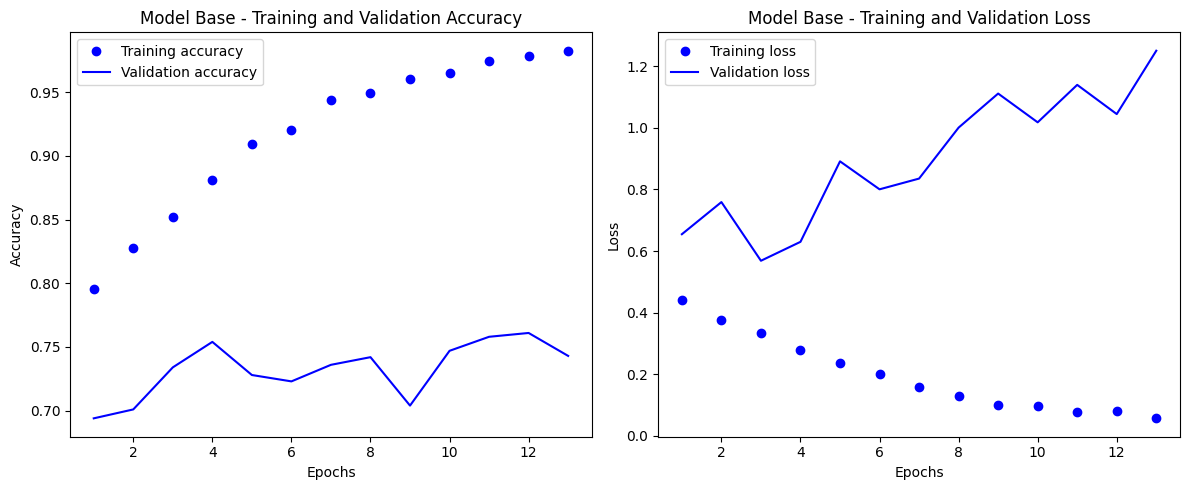

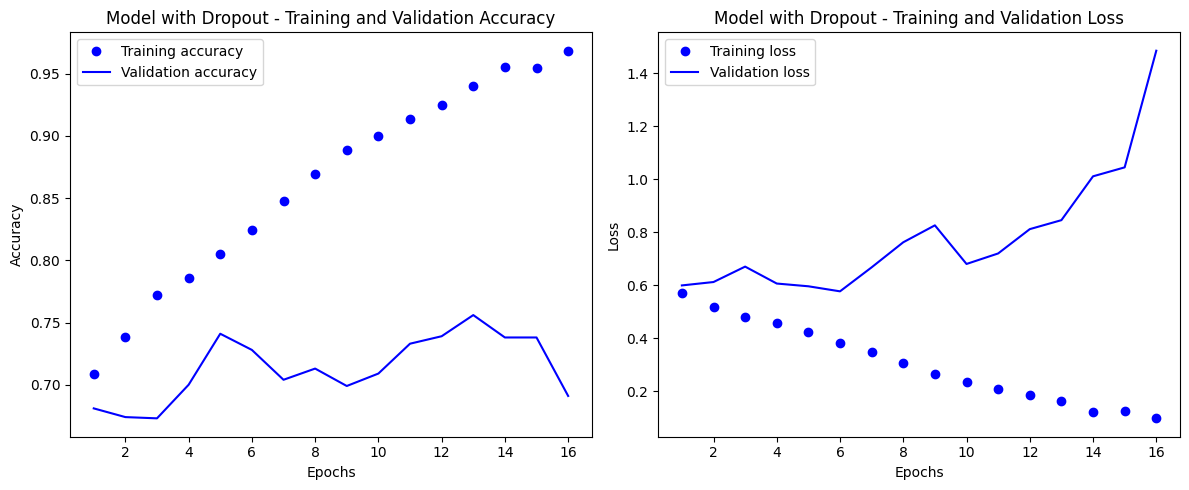

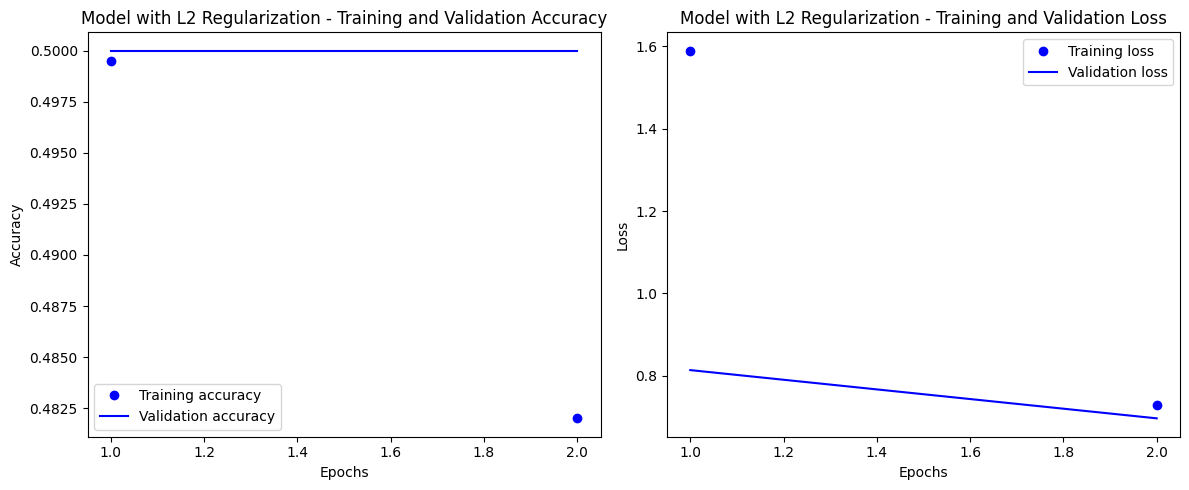

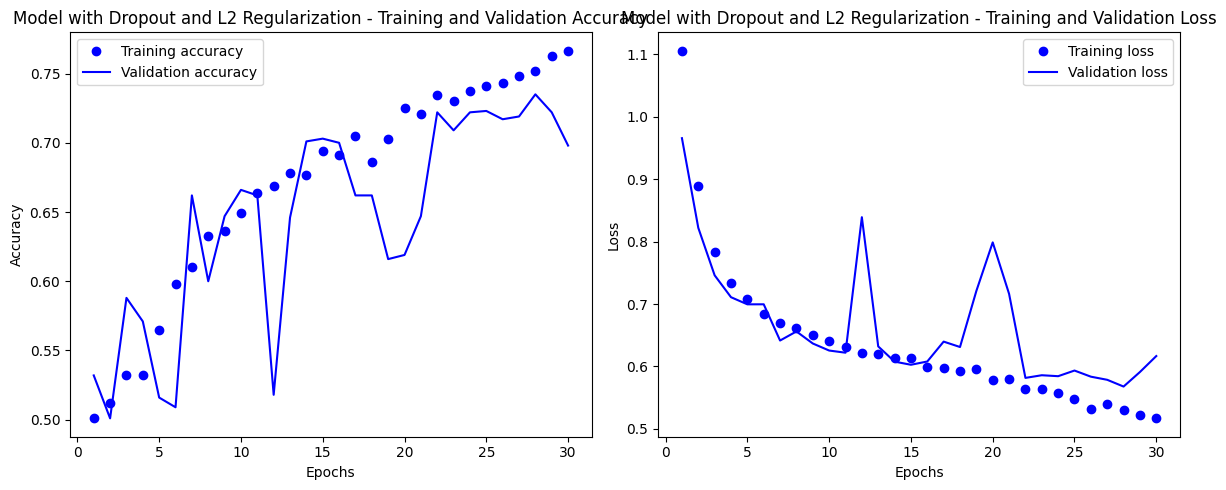

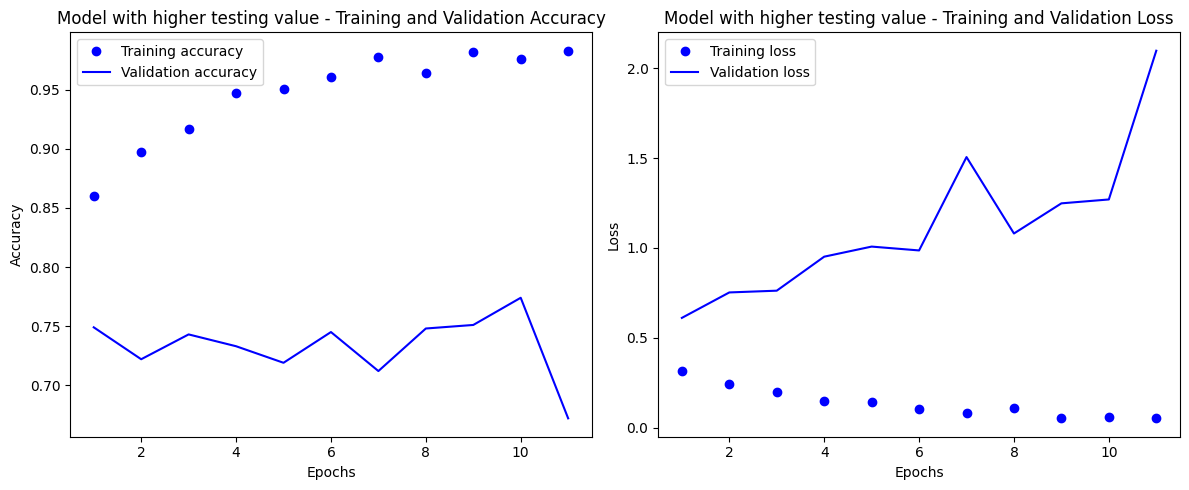

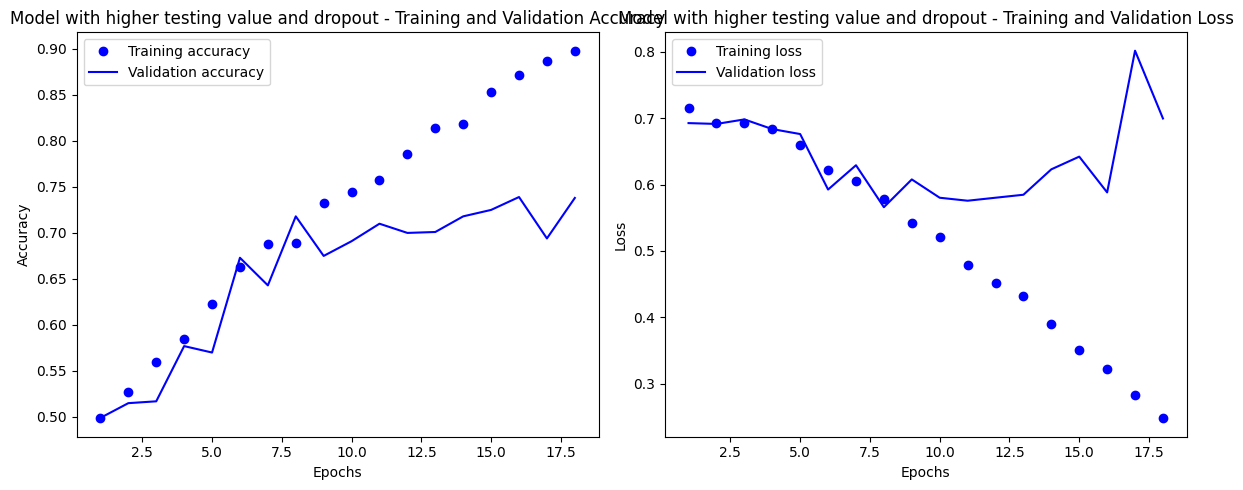

In [31]:
import matplotlib.pyplot as plt

# Function to plot training and validation metrics
def plot_training_history(history, model_name):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(accuracy) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))  # Create a new figure for each model
    plt.subplot(1, 2, 1)  # Create a subplot for accuracy
    plt.plot(epochs, accuracy, "bo", label="Training accuracy")
    plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
    plt.title(f"{model_name} - Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)  # Create a subplot for loss
    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title(f"{model_name} - Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()  # Adjust the layout
    plt.show()

# Plot training history for each model
plot_training_history(hist_base, "Model Base")
plot_training_history(hist_d, "Model with Dropout")
plot_training_history(hist_L2, "Model with L2 Regularization")
plot_training_history(hist_d_L2, "Model with Dropout and L2 Regularization")
plot_training_history(hist_base_1500, "Model with higher testing value")
plot_training_history(hist_d_2000, "Model with higher testing value and dropout")

In [32]:
# Evaluate the model directly after training
test_loss, test_acc = mod_base.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 126s 4s/step - accuracy: 0.7346 - loss: 0.6816
Test accuracy: 0.718


In [33]:
# Evaluate the model directly after training
test_loss, test_acc = mod_d.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.7407 - loss: 0.5509
Test accuracy: 0.726


In [34]:
# Evaluate the model directly after training
test_loss, test_acc = mod_L2.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.5212 - loss: 0.6969
Test accuracy: 0.500


In [35]:
# Evaluate the model directly after training
test_loss, test_acc = mod_d_L2.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7482 - loss: 0.5646
Test accuracy: 0.725


In [36]:
# Evaluate the model directly after training
test_loss, test_acc = mod_base_500.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.7354 - loss: 0.7005
Test accuracy: 0.718


In [37]:
# Evaluate the model directly after training
test_loss, test_acc = mod_base_1500.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.7249 - loss: 0.7033
Test accuracy: 0.718


In [38]:
# Evaluate the model directly after training
test_loss, test_acc = mod_d_2000.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.7500 - loss: 0.5317
Test accuracy: 0.726


### Pretrained Model

In [39]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [40]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [42]:
train_features.shape

(2000, 5, 5, 512)

Defining and training the densely connected classifier

In [43]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss"),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,  # Number of epochs to wait for improvement
        restore_best_weights=True  # Restore model weights from the epoch with the best value
    )
]
history = model.fit(
    train_features, train_labels,
    epochs=12, #based on the graph highest accuracy
    validation_data=(val_features, val_labels),
    callbacks=callbacks)


Epoch 1/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8639 - loss: 35.1163 - val_accuracy: 0.8440 - val_loss: 34.9084
Epoch 2/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9750 - loss: 4.7558 - val_accuracy: 0.9670 - val_loss: 4.8954
Epoch 3/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9908 - loss: 1.3448 - val_accuracy: 0.9720 - val_loss: 4.5188
Epoch 4/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9884 - loss: 0.8168 - val_accuracy: 0.9760 - val_loss: 3.9586
Epoch 5/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9902 - loss: 2.4181 - val_accuracy: 0.9730 - val_loss: 4.3880
Epoch 6/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9992 - loss: 0.1311 - val_accuracy: 0.9690 - val_loss: 5.1053
Epoch 7/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9975 - loss: 0.3495 - val_accuracy: 0.9690 - val_loss: 6.0975
Epoch 8/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9992 - loss: 0.0299 - val_accuracy: 0.9760 - val_lo

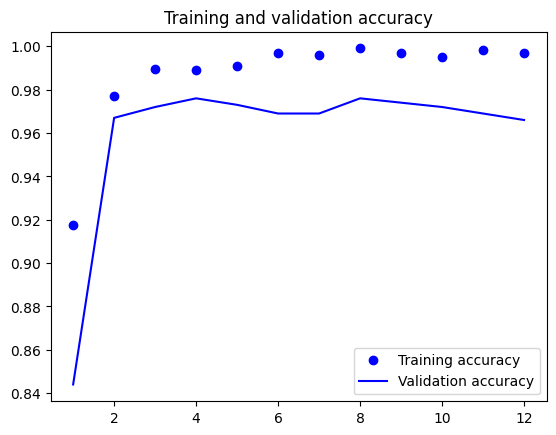

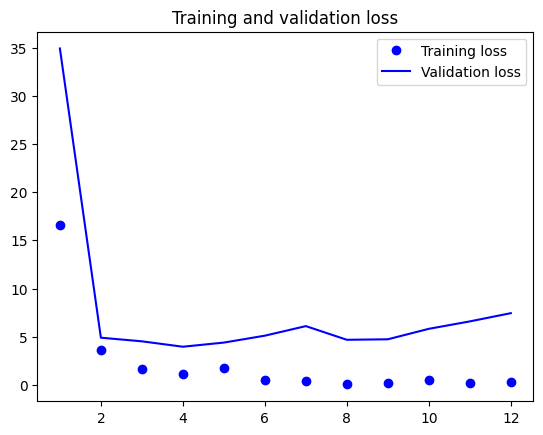

In [44]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [45]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [46]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [47]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [48]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [49]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [50]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss"),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,  # Number of epochs to wait for improvement
        restore_best_weights=True  # Restore model weights from the epoch with the best value
    )
]
history = model.fit(
    train_dataset,
    epochs=11, # best accuracy
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/11
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 226ms/step - accuracy: 0.6341 - loss: 7.0951 - val_accuracy: 0.9190 - val_loss: 0.5872
Epoch 2/11
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - accuracy: 0.8559 - loss: 1.4695 - val_accuracy: 0.9540 - val_loss: 0.3293
Epoch 3/11
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.9002 - loss: 0.7754 - val_accuracy: 0.9670 - val_loss: 0.2392
Epoch 4/11
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - accuracy: 0.9217 - loss: 0.5023 - val_accuracy: 0.9690 - val_loss: 0.2127
Epoch 5/11
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 197ms/step - accuracy: 0.9350 - loss: 0.2949 - val_accuracy: 0.9680 - val_loss: 0.1829
Epoch 6/11
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - accuracy: 0.9395 - loss: 0.2476 - val_accuracy: 0.9700 - val_loss: 0.1669
Epoch 7/11
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - accuracy: 0.9371 - loss: 0.2381 - val_accuracy: 0.9670 - val_loss: 0.1621
Epoch 8/11
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - accuracy: 0.9477 - loss: 0.1877 - val_accu

In [51]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.9764 - loss: 0.1211
Test accuracy: 0.973


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7320 - loss: 0.7019
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.7480 - loss: 0.5404 
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.5114 - loss: 0.6970 
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.7436 - loss: 0.5596
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7476 - loss: 0.6494
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.7250 - loss: 0.7102
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.7462 - loss: 0.5597
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.9728 - loss: 0.1462


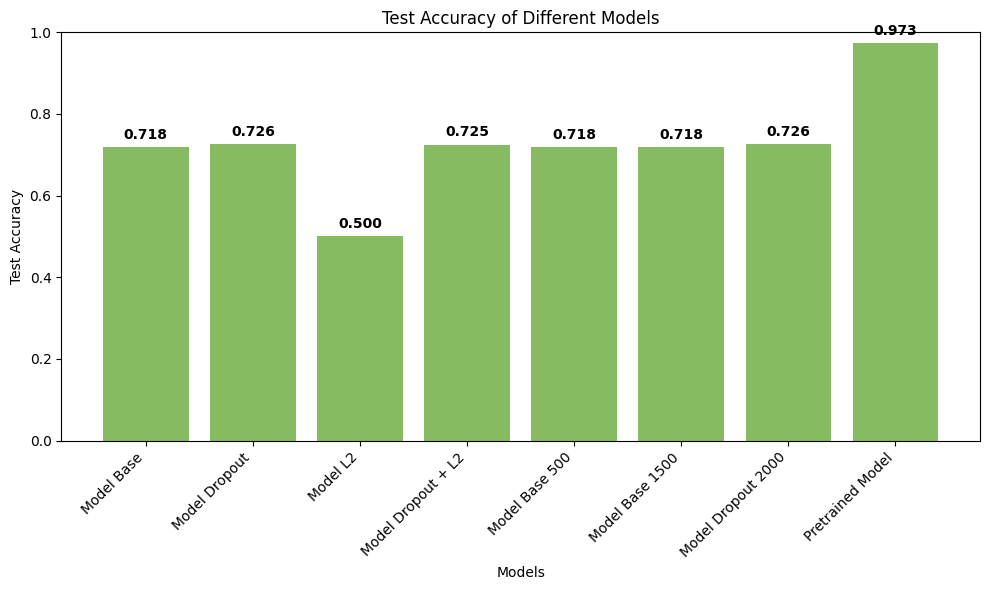

In [52]:
# Evaluate each model and store the accuracy
model_base_test_loss, model_base_test_acc = mod_base.evaluate(test_dataset)
model_d_test_loss, model_d_test_acc = mod_d.evaluate(test_dataset)
model_L2_test_loss, model_L2_test_acc = mod_L2.evaluate(test_dataset)
model_d_L2_test_loss, model_d_L2_test_acc = mod_d_L2.evaluate(test_dataset)
model_base_500_test_loss, model_base_500_test_acc = mod_base_500.evaluate(test_dataset)
model_base_1500_test_loss, model_base_1500_test_acc = mod_base_1500.evaluate(test_dataset)
model_d_2000_test_loss, model_d_2000_test_acc = mod_d_2000.evaluate(test_dataset)
pretrained_model_test_loss, pretrained_model_test_acc = model.evaluate(test_dataset)

# Now, let's put these accuracies in a list for plotting
test_accuracies = [
    model_base_test_acc, model_d_test_acc, model_L2_test_acc, model_d_L2_test_acc,
    model_base_500_test_acc, model_base_1500_test_acc, model_d_2000_test_acc, pretrained_model_test_acc
]

# Names of the models for display on the plot
model_names = [
    "Model Base", "Model Dropout", "Model L2", "Model Dropout + L2",
    "Model Base 500", "Model Base 1500", "Model Dropout 2000", "Pretrained Model"
]

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies, color='#87BB62')
plt.xlabel("Models")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy of Different Models")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1

# Show the accuracy values on top of each bar
for i, v in enumerate(test_accuracies):
    plt.text(i, v + 0.02, f"{v:.3f}", ha="center", fontweight="bold")

plt.tight_layout()
plt.show()
